### Extract Reviews Directly from the Website (GSM_ARENA)

In [ ]:

import requests
import random
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "lxml").get_text()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into text
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

P = []

# List of user agents to rotate
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:54.0) Gecko/20100101 Firefox/54.0',
    'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    # Add more user agents as needed
]

# Fetch every 10 pages
for i in range(2, 542, 10):
    url = f"https://www.gsmarena.com/apple_iphone_6-reviews-6378p{i}.php"

    # Rotate user agent
    headers = {
        'User-Agent': random.choice(user_agents)
    }

    r = requests.get(url, headers=headers)
    print(f"Fetching page {i}: {r.status_code}")

    if r.status_code != 200:
        print(f"Failed to retrieve page {i}")
        continue

    soup = BeautifulSoup(r.text, "lxml")

    reviews = soup.find_all('div', class_='user-thread')
    if not reviews:
        print(f"No reviews found on page {i}")

    for review in reviews:
        text = review.find('p', class_='uopin')
        if text:
            k = text.get_text(strip=True)
            cleaned_review = clean_text(k)
            P.append(cleaned_review)

# Save the cleaned data to a CSV file
df = pd.DataFrame(P, columns=["Cleaned_Review"])
#df.to_csv("GSM_ARENA_REVIEWS.csv", index=False)
print("Cleaned data saved successfully.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fetching page 2: 200


<ipython-input-44-6070a8cbc7cc>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


Fetching page 12: 200
Fetching page 22: 200
Fetching page 32: 200
Fetching page 42: 200
Fetching page 52: 200
Fetching page 62: 200
Fetching page 72: 200
Fetching page 82: 200
Fetching page 92: 200
Fetching page 102: 200
Fetching page 112: 200
Fetching page 122: 200
Fetching page 132: 200
Fetching page 142: 200
Fetching page 152: 200
Fetching page 162: 200
Fetching page 172: 200
Fetching page 182: 200
Fetching page 192: 200
Fetching page 202: 200
Fetching page 212: 200
Fetching page 222: 200
Fetching page 232: 200
Fetching page 242: 200
Fetching page 252: 200
Fetching page 262: 200
Fetching page 272: 200
Fetching page 282: 200
Fetching page 292: 200
Fetching page 302: 200
Fetching page 312: 200
Fetching page 322: 200
Fetching page 332: 200
Fetching page 342: 200
Fetching page 352: 200
Fetching page 362: 200
Fetching page 372: 200
Fetching page 382: 200
Fetching page 392: 200
Fetching page 402: 200
Fetching page 412: 200


<ipython-input-44-6070a8cbc7cc>:17: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


Fetching page 422: 200
Fetching page 432: 200
Fetching page 442: 200
Fetching page 452: 200
Fetching page 462: 200
Fetching page 472: 200
Fetching page 482: 200
Fetching page 492: 200
Fetching page 502: 200
Fetching page 512: 200
Fetching page 522: 200
Fetching page 532: 200
Cleaned data saved successfully.


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving GSM_ARENA_REVIEWS.csv to GSM_ARENA_REVIEWS.csv


### Cleaned reviews are saved under "GSM_ARENA_REVIEWS.csv"

### Import the Cleaned Reviews Dataset

In [ ]:
import pandas as pd
df2= pd.read_csv("GSM_ARENA_REVIEWS.csv")
df2

,Cleaned_Review,Sentiment,Positive,Neutral,Negative,Compound
0,switched nokia g today years iphone great phon...,Positive,0.262,0.654,0.085,0.6808
1,add atleast version update,Neutral,0.000,1.000,0.000,0.0000
2,anonymous jun still thinnest iphone ever wonde...,Neutral,0.000,1.000,0.000,0.0000
3,still thinnest iphone ever wonder beat,Neutral,0.000,1.000,0.000,0.0000
4,hussain jul gets mine soonok dont sit,Neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
1068,robot may reply freezegame im android fan appl...,Positive,0.231,0.673,0.096,0.8126
1069,anonymous may fortune teller think prediction ...,Positive,0.204,0.616,0.180,0.2561
1070,reply freezegame im android fan apple fan youv...,Neutral,0.164,0.696,0.139,-0.0258
1071,anonymous may person know read well bad sense ...,Positive,0.235,0.664,0.101,0.6694


In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.shape

(1073, 1)

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2["Cleaned_Review"][2]

'anonymous jun still thinnest iphone ever wonder beatyepstill using backup phone'

In [ ]:
l = []

for i in range(0, 10):
    dff = df2["Cleaned_Review"][i]
    l.append(dff)
    print(dff)
    print()


switched nokia g today years iphone great phone thumbs upnow obsolete yes years started counting time found time get new phone

add atleast version update

anonymous jun still thinnest iphone ever wonder beatyepstill using backup phone

still thinnest iphone ever wonder beat

hussain jul gets mine soonok dont sit

anonymous mar needs ios apple cant provide ios due hardware limitations

noif market new phone extreme budget get literally anything else eitherthe phone hasnt updated years app compatibility going get worse phone horrifically unreliableeven extreme apple fanboy get low end android phone youll get nice stuff like app support phone doesnt eat batteries destroy motherboardbesides low end smartphones nowadays plenty powerful enough even bloated social media programs

used ph updated ios time ph wifi network system problem solve problem

last iphone continued ergonomic advantage predecessor instead straight downgrade regard iphone g rounded g making feel better hand iphone feel g

### Perform Sentiment Analysis Using VADER model.

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load your CSV file

reviews_df = pd.read_csv("GSM_ARENA_REVIEWS.csv")

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment from review text
def get_sentiment(review):
    scores = sid.polarity_scores(review)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


# Convert values in 'Cleaned_Review' column to strings
reviews_df['Cleaned_Review'] = reviews_df['Cleaned_Review'].astype(str)

# Apply sentiment analysis to the cleaned reviews
reviews_df['Sentiment'] = reviews_df['Cleaned_Review'].apply(get_sentiment)

#reviews_df.to_csv("VADER_Sentiment_File.csv", index=False)
# Display the results
print(reviews_df.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                      Cleaned_Review Sentiment
0  switched nokia g today years iphone great phon...  Positive
1                         add atleast version update   Neutral
2  anonymous jun still thinnest iphone ever wonde...   Neutral
3             still thinnest iphone ever wonder beat   Neutral
4              hussain jul gets mine soonok dont sit   Neutral


In [ ]:


# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(review):
    scores = sid.polarity_scores(review)
    return scores['compound']

# Apply sentiment analysis to the cleaned reviews
reviews_df['Sentiment Score'] = reviews_df['Cleaned_Review'].apply(get_sentiment_score)

# Display the results
print(reviews_df.head())


                                      Cleaned_Review Sentiment  Positive  \
0  switched nokia g today years iphone great phon...  Positive     0.262   
1                         add atleast version update   Neutral     0.000   
2  anonymous jun still thinnest iphone ever wonde...   Neutral     0.000   
3             still thinnest iphone ever wonder beat   Neutral     0.000   
4              hussain jul gets mine soonok dont sit   Neutral     0.000   

   Neutral  Negative  Compound  Sentiment Score  
0    0.654     0.085    0.6808           0.6808  
1    1.000     0.000    0.0000           0.0000  
2    1.000     0.000    0.0000           0.0000  
3    1.000     0.000    0.0000           0.0000  
4    1.000     0.000    0.0000           0.0000  


In [ ]:
reviews_df.head(15)

,Cleaned_Review,Sentiment,Positive,Neutral,Negative,Compound,Sentiment Score
0,switched nokia g today years iphone great phon...,Positive,0.262,0.654,0.085,0.6808,0.6808
1,add atleast version update,Neutral,0.000,1.000,0.000,0.0000,0.0000
2,anonymous jun still thinnest iphone ever wonde...,Neutral,0.000,1.000,0.000,0.0000,0.0000
3,still thinnest iphone ever wonder beat,Neutral,0.000,1.000,0.000,0.0000,0.0000
4,hussain jul gets mine soonok dont sit,Neutral,0.000,1.000,0.000,0.0000,0.0000
5,anonymous mar needs ios apple cant provide ios...,Neutral,0.000,1.000,0.000,0.0000,0.0000
6,noif market new phone extreme budget get liter...,Positive,0.190,0.654,0.156,0.3506,0.3506
7,used ph updated ios time ph wifi network syste...,Negative,0.111,0.556,0.333,-0.5574,-0.5574
8,last iphone continued ergonomic advantage pred...,Positive,0.278,0.722,0.000,0.9559,0.9559
9,phone works great make sure update ios fast se...,Positive,0.408,0.592,0.000,0.8934,0.8934


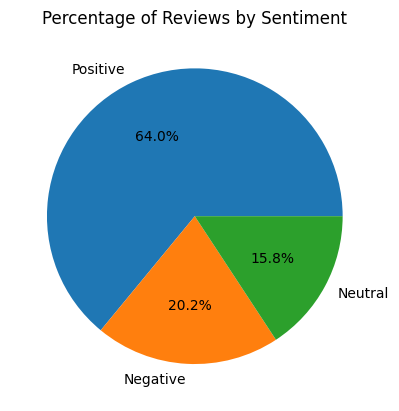

In [ ]:

import matplotlib.pyplot as plt

# Count the number of reviews for each sentiment
sentiment_counts = reviews_df['Sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Reviews by Sentiment')
plt.show()


### Import the VADER_Sentiment_File

In [ ]:


from google.colab import files

uploaded = files.upload()

Saving VADER_Sentiment_File.csv to VADER_Sentiment_File (1).csv


In [ ]:
df3 = pd.read_csv("VADER_Sentiment_File.csv")
df3

,Cleaned_Review,Sentiment
0,switched nokia g today years iphone great phon...,Positive
1,add atleast version update,Neutral
2,anonymous jun still thinnest iphone ever wonde...,Neutral
3,still thinnest iphone ever wonder beat,Neutral
4,hussain jul gets mine soonok dont sit,Neutral
...,...,...
1068,robot may reply freezegame im android fan appl...,Positive
1069,anonymous may fortune teller think prediction ...,Positive
1070,reply freezegame im android fan apple fan youv...,Neutral
1071,anonymous may person know read well bad sense ...,Positive


In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3.head()

,Cleaned_Review,Sentiment
0,switched nokia g today years iphone great phon...,Positive
1,add atleast version update,Neutral
2,anonymous jun still thinnest iphone ever wonde...,Neutral
3,still thinnest iphone ever wonder beat,Neutral
4,hussain jul gets mine soonok dont sit,Neutral


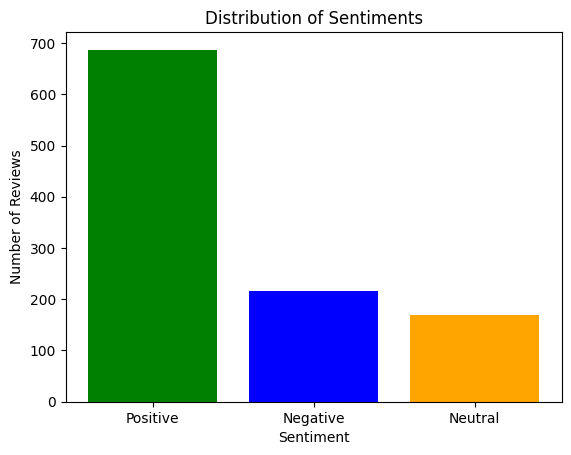

In [ ]:
import matplotlib.pyplot as plt

# Your DataFrame
data = df3
df = pd.DataFrame(data)

# Count the number of reviews for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'orange'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments')
plt.show()


In [ ]:


# Calculate the word count of each review
reviews_df['Word Count'] = reviews_df['Cleaned_Review'].str.split().str.len()

# Calculate the average word length of Cleaned_Review
average_word_length = sum(len(word) for review in reviews_df['Cleaned_Review'] for word in review.split()) / sum(len(review.split()) for review in reviews_df['Cleaned_Review'])

# Print the results
print("Average word length of Cleaned_Review:", average_word_length)

# Display the reviews_df with the new columns
reviews_df.head()


Average word length of Cleaned_Review: 5.607121323775709


,Cleaned_Review,Sentiment,Positive,Neutral,Negative,Compound,Sentiment Score,Word Count
0,switched nokia g today years iphone great phon...,Positive,0.262,0.654,0.085,0.6808,0.6808,21
1,add atleast version update,Neutral,0.000,1.000,0.000,0.0000,0.0000,4
2,anonymous jun still thinnest iphone ever wonde...,Neutral,0.000,1.000,0.000,0.0000,0.0000,11
3,still thinnest iphone ever wonder beat,Neutral,0.000,1.000,0.000,0.0000,0.0000,6
4,hussain jul gets mine soonok dont sit,Neutral,0.000,1.000,0.000,0.0000,0.0000,7


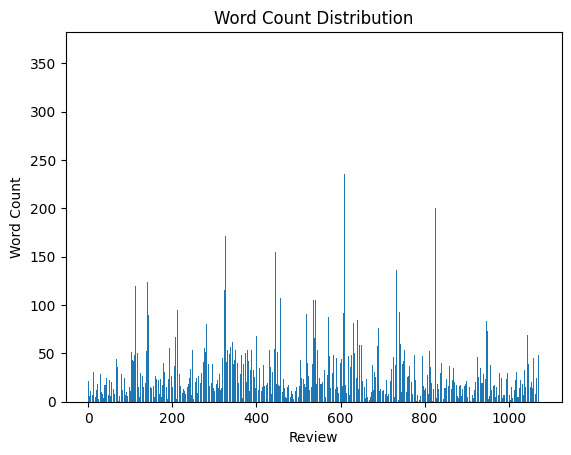

In [ ]:


# Import the necessary libraries
import matplotlib.pyplot as plt

# Get the word count for each review
word_counts = reviews_df['Word Count']

# Create a bar chart
plt.bar(range(len(word_counts)), word_counts)

# Add labels and title
plt.xlabel('Review')
plt.ylabel('Word Count')
plt.title('Word Count Distribution')

# Show the chart
plt.show()


In [ ]:
df3[df3["Sentiment"] == "Positive"].count()

Cleaned_Review    687
Sentiment         687
dtype: int64

In [ ]:
df3["Sentiment"].value_counts()

Positive    687
Negative    217
Neutral     169
Name: Sentiment, dtype: int64

In [ ]:
687+217+169

1073

### MODEL PRIDICTION WITH VADER

In [ ]:

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
df = pd.DataFrame(df3)

# Ensure true sentiments are in uppercase to match VADER predictions
df['Sentiment'] = df['Sentiment'].str.upper()

# Convert values in 'Cleaned_Review' column to strings (in case they are not already)
df['Cleaned_Review'] = df['Cleaned_Review'].astype(str)

# Predict sentiments for the cleaned reviews
df['Sentiment_Predicted'] = df['Cleaned_Review'].apply(get_sentiment)

# Check the distribution of true and predicted sentiments
print("True Sentiment Distribution:")
print(df['Sentiment'].value_counts())
print()
print("Predicted Sentiment Distribution:")
print(df['Sentiment_Predicted'].value_counts())
print()






True Sentiment Distribution:
Sentiment
POSITIVE    687
NEGATIVE    217
NEUTRAL     169
Name: count, dtype: int64

Predicted Sentiment Distribution:
Sentiment_Predicted
POSITIVE    687
NEGATIVE    217
NEUTRAL     169
Name: count, dtype: int64



In [ ]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(df['Sentiment'], df['Sentiment_Predicted'])
precision, recall, f1, _ = precision_recall_fscore_support(df['Sentiment'], df['Sentiment_Predicted'], average='weighted', zero_division=1)
conf_matrix = confusion_matrix(df['Sentiment'], df['Sentiment_Predicted'])

# Print evaluation metrics
print(f'Model Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print()

Model Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[217   0   0]
 [  0 169   0]
 [  0   0 687]]



In [ ]:
# Example Prediction
new_review = "The mobile is waste of money dont buy it"

# Make prediction using the VADER model
new_review_sentiment = get_sentiment(new_review)
print("Predicted sentiment for new review:", new_review_sentiment)
print()

# Print some samples from the dataset with actual and predicted sentiments
test_results = df[['Cleaned_Review', 'Sentiment', 'Sentiment_Predicted']].head(10)
print(test_results)
print()

# Additional diagnostic output: check samples with mismatched predictions
mismatches = df[df['Sentiment'] != df['Sentiment_Predicted']]
print("Mismatched Samples:")
print(mismatches[['Cleaned_Review', 'Sentiment', 'Sentiment_Predicted']].head(10))

Predicted sentiment for new review: NEGATIVE

                                      Cleaned_Review Sentiment  \
0  switched nokia g today years iphone great phon...  POSITIVE   
1                         add atleast version update   NEUTRAL   
2  anonymous jun still thinnest iphone ever wonde...   NEUTRAL   
3             still thinnest iphone ever wonder beat   NEUTRAL   
4              hussain jul gets mine soonok dont sit   NEUTRAL   
5  anonymous mar needs ios apple cant provide ios...   NEUTRAL   
6  noif market new phone extreme budget get liter...  POSITIVE   
7  used ph updated ios time ph wifi network syste...  NEGATIVE   
8  last iphone continued ergonomic advantage pred...  POSITIVE   
9  phone works great make sure update ios fast se...  POSITIVE   

  Sentiment_Predicted  
0            POSITIVE  
1             NEUTRAL  
2             NEUTRAL  
3             NEUTRAL  
4             NEUTRAL  
5             NEUTRAL  
6            POSITIVE  
7            NEGATIVE  
8          

In [ ]:
# Example Prediction
new_review = "this phone is  good at all for some cases but battery is good"

# Make prediction using the VADER model
new_review_sentiment = get_sentiment(new_review)
print("Predicted sentiment for new review:", new_review_sentiment)

Predicted sentiment for new review: POSITIVE


In [ ]:
# Example Prediction
new_review = "worst product ever"

# Make prediction using the VADER model
new_review_sentiment = get_sentiment(new_review)
print("Predicted sentiment for new review:", new_review_sentiment)

Predicted sentiment for new review: NEGATIVE


###hhhhhh

In [1]:

from google.colab import files


uploaded = files.upload()


Saving VADER_Sentiment_File.csv to VADER_Sentiment_File.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df6=pd.read_csv("VADER_Sentiment_File.csv")
df6

,Cleaned_Review,Sentiment
0,switched nokia g today years iphone great phon...,Positive
1,add atleast version update,Neutral
2,anonymous jun still thinnest iphone ever wonde...,Neutral
3,still thinnest iphone ever wonder beat,Neutral
4,hussain jul gets mine soonok dont sit,Neutral
...,...,...
1068,robot may reply freezegame im android fan appl...,Positive
1069,anonymous may fortune teller think prediction ...,Positive
1070,reply freezegame im android fan apple fan youv...,Neutral
1071,anonymous may person know read well bad sense ...,Positive


In [4]:
# lebel encoding  sentiment column

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the unique values in the 'Sentiment' column
label_encoder.fit(df6['Sentiment'].unique())

# Transform the 'Sentiment' column using the encoder
df6['Sentiment_Encoded'] = label_encoder.transform(df6['Sentiment'])

# Print the first 10 rows of the DataFrame
print(df6.head(10))


                                      Cleaned_Review Sentiment  \
0  switched nokia g today years iphone great phon...  Positive   
1                         add atleast version update   Neutral   
2  anonymous jun still thinnest iphone ever wonde...   Neutral   
3             still thinnest iphone ever wonder beat   Neutral   
4              hussain jul gets mine soonok dont sit   Neutral   
5  anonymous mar needs ios apple cant provide ios...   Neutral   
6  noif market new phone extreme budget get liter...  Positive   
7  used ph updated ios time ph wifi network syste...  Negative   
8  last iphone continued ergonomic advantage pred...  Positive   
9  phone works great make sure update ios fast se...  Positive   

   Sentiment_Encoded  
0                  2  
1                  1  
2                  1  
3                  1  
4                  1  
5                  1  
6                  2  
7                  0  
8                  2  
9                  2  


In [5]:
df6.isnull().sum()

Cleaned_Review       1
Sentiment            0
Sentiment_Encoded    0
dtype: int64

In [6]:


df6 = df6.dropna(axis=0, how='any')


In [7]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df6.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df6.iloc[i]['Cleaned_Review'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [8]:
cv = CountVectorizer()

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
Y = df6['Sentiment_Encoded'].values

In [ ]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [9]:
Y

array([2, 1, 1, ..., 1, 2, 1])

In [11]:
print(f"X shape: {X.shape}")
print(f"y shape: {Y.shape}")

X shape: (1072, 4764)
y shape: (1072,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (750, 4764)
y train: (750,)
X test: (322, 4764)
y test: (322,)


In [13]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 25


In [14]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [15]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [16]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.6956521739130435


In [17]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [30]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

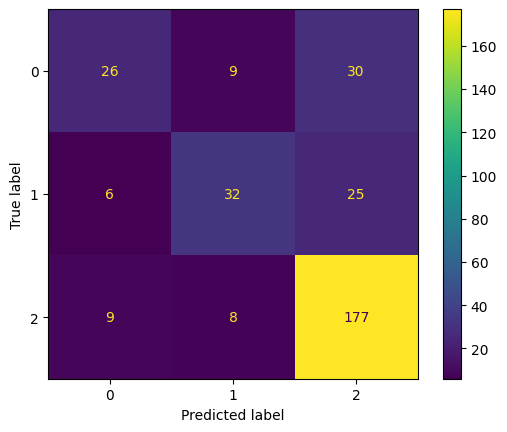

In [31]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [18]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.6973333333333332
Standard Variance : 0.02862788073811185


In [19]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [20]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [21]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [22]:

print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 97.95
Cross validation mean accuracy on test set : 66.41666666666667
Accuracy score for test set : 0.6956521739130435


In [23]:
# XG Boost
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.992
Testing Accuracy : 0.7360248447204969


In [25]:
y_preds = model_xgb.predict(X_test)

In [32]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 26   9  30]
 [  6  32  25]
 [  9   8 177]]


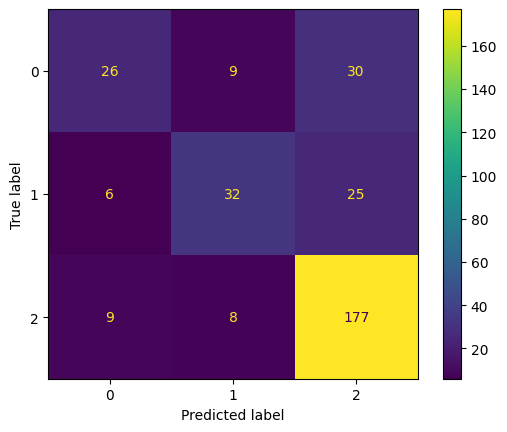

In [33]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [27]:
# prompt: on the besis of prediction i want test my model with random text

new_text = "out of the all the headsets i have used this by far the worst. quality is terrible whoever you talk to will have issues hearing you, the left side stopped working the first week and the right side stopped working after the 2nd week, bought a higher end mouse from this brand and cant use it for more then 2 minutes without it having connection issues. They just pump out the cheapest products."

# Preprocess the text
new_text = re.sub('[^a-zA-Z]', ' ', new_text)
new_text = new_text.lower().split()
new_text = [stemmer.stem(word) for word in new_text if not word in STOPWORDS]
new_text = ' '.join(new_text)

# Convert the text to a vector
new_text_vector = cv.transform([new_text]).toarray()

# Scale the vector
new_text_vector_scaled = scaler.transform(new_text_vector)

# Make a prediction
prediction = model_rf.predict(new_text_vector_scaled)

# Print the prediction
print(f"Predicted sentiment for new text: {label_encoder.inverse_transform(prediction)}")


Predicted sentiment for new text: ['Positive']


In [28]:
# prompt: on the besis of prediction i want test my model with random text

new_text = "this mobile is very good"

# Preprocess the text
new_text = re.sub('[^a-zA-Z]', ' ', new_text)
new_text = new_text.lower().split()
new_text = [stemmer.stem(word) for word in new_text if not word in STOPWORDS]
new_text = ' '.join(new_text)

# Convert the text to a vector
new_text_vector = cv.transform([new_text]).toarray()

# Scale the vector
new_text_vector_scaled = scaler.transform(new_text_vector)

# Make a prediction
prediction = model_rf.predict(new_text_vector_scaled)

# Print the prediction
print(f"Predicted sentiment for new text: {label_encoder.inverse_transform(prediction)}")


Predicted sentiment for new text: ['Positive']


In [ ]:
new_text = "it is a average product"

# Preprocess the text
new_text = re.sub('[^a-zA-Z]', ' ', new_text)
new_text = new_text.lower().split()
new_text = [stemmer.stem(word) for word in new_text if not word in STOPWORDS]
new_text = ' '.join(new_text)

# Convert the text to a vector
new_text_vector = cv.transform([new_text]).toarray()

# Scale the vector
new_text_vector_scaled = scaler.transform(new_text_vector)

# Make a prediction
prediction = model_rf.predict(new_text_vector_scaled)

# Print the prediction
print(f"Predicted sentiment for new text: {label_encoder.inverse_transform(prediction)}")

Predicted sentiment for new text: ['Neutral']
